In [159]:
import torch
from torch import nn,optim
import torch.nn.functional
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os as os
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,multilabel_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc,roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from scipy.stats import kurtosis,skew
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
import scipy.stats
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

import pickle
from sklearn.model_selection import cross_val_score

#import warnings

#warnings.simplefilter(action='ignore', category=FutureWarning)

In [160]:
path_dataframes="/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/dataframes"


In [161]:
df_train_anomaly = pd.read_csv(f"{path_dataframes}/df_anomaly.csv")
df_test = pd.read_csv(f"{path_dataframes}/df_test.csv")
df_labels_train = pd.read_csv(f"{path_dataframes}/df_anomaly_labels.csv")



In [162]:
df_train_anomaly

,Unnamed: 0,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,...,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,139,0.087650,0.316981,0.617906,0.761375,0.783330,0.067674,0.732044,0.012818,0.765511,...,0.545629,0.412600,0.782646,0.789835,0.793702,0.809275,0.034113,0.004243,0.155982,0.387421
1,119,0.183376,0.410158,0.925146,0.931699,0.939097,0.127272,0.818575,0.076827,0.974910,...,0.961633,0.498887,0.752860,0.765362,0.634671,0.786511,0.174547,0.013377,0.526936,0.295796
2,173,0.824787,0.697196,0.719323,0.781425,0.801969,0.509144,0.428516,0.880071,0.583065,...,0.138386,0.717433,0.569406,0.647391,0.448477,0.675020,0.221795,0.040686,0.730663,0.504753
3,109,0.818104,0.608123,0.429840,0.321349,0.350809,0.496424,0.182820,0.002761,0.164377,...,0.456168,0.868375,0.419443,0.005956,0.230272,0.006808,0.744361,0.424390,0.716813,0.220123
4,140,0.135018,0.314554,0.634253,0.770942,0.792234,0.047605,0.761567,0.008580,0.781135,...,0.621035,0.406587,0.819449,0.817996,0.759771,0.835322,0.132962,0.006799,0.166816,0.297008
5,161,0.643604,0.891434,0.605695,0.718851,0.743519,0.072513,0.630666,0.007586,0.906942,...,0.641460,0.878992,0.609326,0.695690,0.579271,0.721025,0.209379,0.425187,1.000000,0.297037
6,118,0.235673,0.420794,0.858334,0.903191,0.913421,0.157916,0.744248,0.105782,0.965752,...,0.945647,0.504865,0.839259,0.746876,0.607178,0.769234,0.176818,0.012717,0.509503,0.279405
7,111,0.173570,0.389152,0.932861,0.971708,0.974876,0.109605,0.795423,0.003394,0.982280,...,0.941770,0.505068,0.685928,0.759736,0.528471,0.781261,0.178516,0.013025,0.529151,0.001112
8,113,0.876307,0.749147,0.250187,0.114248,0.128759,0.195464,0.113976,0.483047,0.184946,...,0.481699,0.776817,0.519733,0.070744,0.000000,0.080016,0.970227,0.179641,0.808542,0.807135
9,114,0.179239,0.425615,0.891330,0.935796,0.942775,0.273140,0.836484,0.019392,0.965570,...,0.934751,0.512463,0.813806,0.744205,0.709016,0.766732,0.167988,0.013892,0.625088,0.040945


In [163]:
df_test=df_test.drop(columns="Unnamed: 0")
df_train_anomaly=df_train_anomaly.drop(columns="Unnamed: 0")

In [164]:
df_test = df_test[df_train_anomaly.columns]

In [165]:
df_test.head()

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.267586,0.579367,0.004113,0.159132,0.175078,0.010260,0.481996,0.022344,0.300361,0.326775,0.003027,0.572211,0.018499,0.340328,0.009736,0.366443,0.007394,0.514575,0.576936,0.222594
1,0.174496,0.456054,0.010592,0.376062,0.402618,0.004116,0.237552,0.000520,0.367703,0.396432,0.004331,0.560290,0.021263,0.224319,0.008859,0.245134,0.002551,0.000000,0.480073,0.000000
2,0.159761,0.409964,0.008928,0.338379,0.363938,0.004516,0.452608,0.000000,0.400208,0.429631,0.004755,0.522409,0.020451,0.286520,0.007852,0.310606,0.002647,0.003580,0.364287,0.067557
3,0.164969,0.418190,0.009861,0.323987,0.349075,0.001144,0.465514,0.007694,0.399965,0.429384,0.004781,0.523314,0.020481,0.287638,0.007912,0.311774,0.002240,0.003556,0.400918,0.237326
4,0.160061,0.404150,0.009074,0.343183,0.368888,0.003939,0.462095,0.000142,0.399723,0.429137,0.004731,0.519834,0.021281,0.286322,0.007926,0.310401,0.002844,0.003583,0.378062,0.049254


In [166]:
df_features = pd.concat([df_test],axis=0)

In [167]:
df_features

,P1_min,P5_HarmonicAmplitudeRatio,P5_rms,P5_variance,P5_std,P1_median,P1_clearance_factor,P5_min,P1_variance,P1_std,P1_rms,P1_HarmonicAmplitudeRatio,P2_75th_percentile,P2_variance,P2_rms,P2_std,P5_25th_percentile,P2_min,P6_HarmonicAmplitudeRatio,P5_fft_25th_percentile
0,0.267586,0.579367,0.004113,0.159132,0.175078,0.010260,0.481996,0.022344,0.300361,0.326775,0.003027,0.572211,0.018499,0.340328,0.009736,0.366443,0.007394,0.514575,0.576936,0.222594
1,0.174496,0.456054,0.010592,0.376062,0.402618,0.004116,0.237552,0.000520,0.367703,0.396432,0.004331,0.560290,0.021263,0.224319,0.008859,0.245134,0.002551,0.000000,0.480073,0.000000
2,0.159761,0.409964,0.008928,0.338379,0.363938,0.004516,0.452608,0.000000,0.400208,0.429631,0.004755,0.522409,0.020451,0.286520,0.007852,0.310606,0.002647,0.003580,0.364287,0.067557
3,0.164969,0.418190,0.009861,0.323987,0.349075,0.001144,0.465514,0.007694,0.399965,0.429384,0.004781,0.523314,0.020481,0.287638,0.007912,0.311774,0.002240,0.003556,0.400918,0.237326
4,0.160061,0.404150,0.009074,0.343183,0.368888,0.003939,0.462095,0.000142,0.399723,0.429137,0.004731,0.519834,0.021281,0.286322,0.007926,0.310401,0.002844,0.003583,0.378062,0.049254
5,0.159694,0.419274,0.010082,0.379752,0.406388,0.003047,0.423002,0.000173,0.399565,0.428977,0.004666,0.526326,0.021799,0.281870,0.007770,0.305747,0.002647,0.003705,0.412452,0.071857
6,1.000000,0.509563,0.987182,0.407620,0.434752,1.000000,0.552867,0.919332,0.635012,0.661883,0.995170,0.459664,0.992406,0.330459,0.986794,0.356256,0.998824,1.000000,0.529848,0.958460
7,0.159696,0.414266,0.010318,0.378024,0.404622,0.002124,0.416537,0.000121,0.400382,0.429808,0.004667,0.526613,0.021605,0.281758,0.007718,0.305630,0.002879,0.003705,0.366530,0.080039
8,0.236218,0.690926,0.006231,0.199444,0.218284,0.005622,0.214704,0.288150,0.063960,0.071981,0.000000,0.554387,0.009811,0.000000,0.001370,0.000000,0.004210,0.016836,0.780953,0.123622
9,0.159689,0.410222,0.010406,0.367355,0.393710,0.002238,0.458650,0.000029,0.400818,0.430252,0.004702,0.526315,0.019601,0.286091,0.007906,0.310159,0.002872,0.003635,0.405242,0.140754


In [168]:
with open(f'/Users/alexdediu/git-projects/Data-Challenge-PHM-Asia-Pacific-2023/models/rf_anomaly_classifier.pkl', 'rb') as file:
    model = pickle.load(file)

    


In [169]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(df_features)

# Aggiungi i cluster al dataset originale
df_features['Cluster'] = kmeans.labels_

/Users/alexdediu/anaconda3/envs/pytorch-env/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [170]:
df_features['Cluster'].values

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0], dtype=int32)

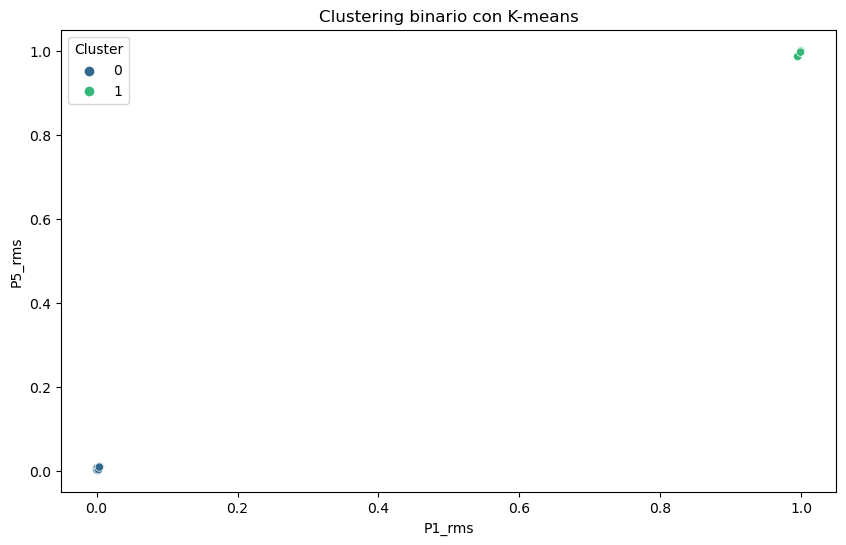

In [171]:
# Visualizzare i cluster (scegli due feature per l'asse x e y)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='P1_rms', y='P5_rms', hue='Cluster', data=df_features, palette='viridis')
plt.title('Clustering binario con K-means')
plt.show()


In [172]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df_features, kmeans.labels_)
print(f'Coefficiente di silhouette: {score}')

Coefficiente di silhouette: 0.8109026439242861


,Unnamed: 0,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [174]:
df_labels_train = df_labels_train.drop(columns="Unnamed: 0")

In [175]:
df_labels_train

,Case,Spacecraft,Condition,SV1,SV2,SV3,SV4,BP1,BP2,BP3,BP4,BP5,BP6,BP7,BV1,binary_condition
0,1,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
1,2,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
2,3,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
3,4,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
4,5,1,1,100,100,100,100,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,173,3,3,100,100,100,100,0,0,0,1,0,0,0,0,1
173,174,3,3,100,100,100,100,0,0,0,0,1,0,0,0,1
174,175,3,3,100,100,100,100,0,0,0,0,0,1,0,0,1
175,176,3,3,100,100,100,100,0,0,0,0,0,0,1,0,1


In [177]:
X_train, X_test, y_train, y_test = train_test_split(df_train_anomaly, df_labels_train["Condition"], test_size=0.33, random_state=42)

# Creiamo il modello di Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Addestriamo il modello
random_forest.fit(X_train, y_train)

# Effettuiamo delle predizioni sul set di test
predictions = random_forest.predict(X_test)

# Calcoliamo l'accuratezza del modello
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calcoliamo la matrice di confusione
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Stampiamo il report di classificazione
class_report = classification_report(y_test, predictions)
print("Classification Report:")
print(class_report)


ValueError: Found input variables with inconsistent numbers of samples: [24, 177]